### *Analyzing and Predicting : CTA Transportation* 
<font size = "3" color = "blue"  >By **Python Demons** (Team - Akshat Pancholi, Faezehossadat Khademi, Kasturi Joshi, Piyush Agrawal and Vipul Dhariwal.)</font> 

#### *Introduction*
Chicago Transit Authority (CTA) is a mass transit operator in Chicago that provides bus and train services. 
We all use CTA on a daily basis. We noticed that sometimes the buses and trains that are a little crowded run at a low frequency, while some buses and trains which are almost empty run at a high frequency. Thus, we decided to explore trends in CTA commuter patterns and found out ways to predict ridership per stop so that we, as commuters, could face the least inconvenience and CTA can use these suggestions to optimize their transportation. 

#### Dataset
We used publicly available dataset in CSV format from portal of City of Chicago.The CTA datasets we used were - Bus monthly ridership, Bus daily ridership, Train monthly ridership, Train daily ridership, Overall CTA ridership. They ranged from 2001 to 2019. [Link for Dataset](http://www.shorturl.at/fpSX1)

In [3]:
#Importing all bus files
import bus_hypo as bh; import bus_clean_vis as bcv; import bus_all_ml as bam
import bus_nuke_ml as bnm; import pandas as pd; import bar_race as br
import numpy as np; import matplotlib.pyplot as plt; import baseline_bus as bb
import Kasturi_J as Kasturi
import ARIMA

#### Data Cleaning
Apart from the usual data cleaning procedures like: Deleting NaN entries,solving multiple entries,converting string to int, deriving columns like year and month; we also cleaned data to make our data more prepared to derive insights. 1. We normalized the yearly and Feburary month ridership for leap years (*365/366) 2. We deleted the routes that were added by CTA temporarily and does not represent regular routes 3. Seperated routes if their name is changed.

In [4]:
monthly = pd.read_csv("data\\Bus_monthly(weekday,weekend,total).csv")
gas = pd.read_csv('data\\gas.csv')
py_data=pd.read_csv("data\\CTA_-_Ridership_-__L__Station_Entries_-_Daily_Totals.csv")
monthly = bcv.clean(monthly) #Cleaned Bus Dataset
py_data = Kasturi.data_cleaning(py_data) #Cleaning the train dataset
# monthly = bcv.clean(monthly) #Cleaned Bus Dataset

#### Exploratory Data Analysis
1. Granularity- The data is grained in monthly fashion for both the bus as well as train datasets. Data is divided for each bus and each train.
2. Structure- **Tabular form** : The data is in the form of CSV files
3. Temporality- The data we have collected ranges from **1st January 2001 to 1st December 2019**
4. Scope- We have **complete data** with respect to scope.Coverage remains the same after filtering some of the columns from both the datasets. 
5. Faithfulness- Though our data is accurate and gives the idea about ridership, it does not capture the reality completely. The ridership is counted while boarding, not unboarding. Assumption: Passenger travelling rides the entire journey of the bus/ train. For trains, count is increased at the station entries. Reality is not captured when a person changes the line internally within a station

#### Visualizations and Insights

7.209120829161296


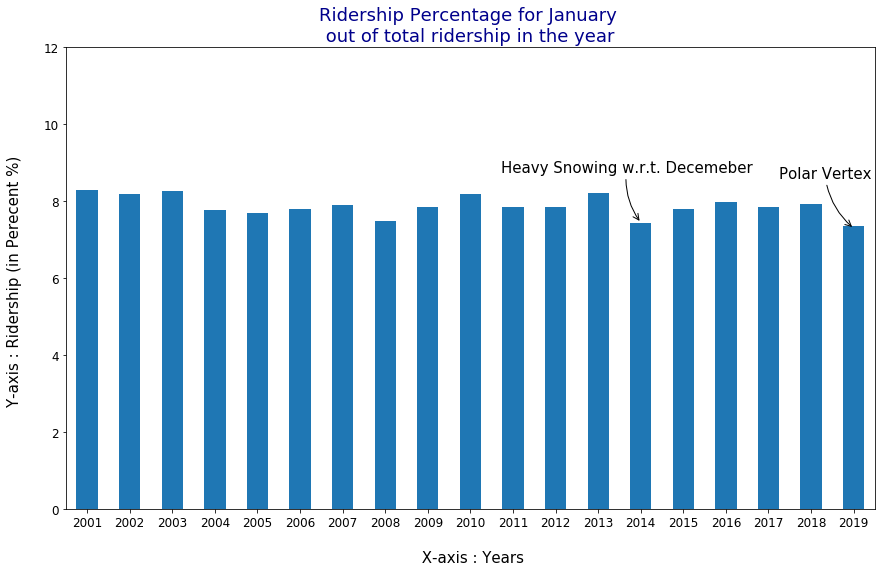

In [5]:
## Insight 1 : Percentage Drop in bus ridership in January Riderhsip due to Polar Vertex
bcv.polar_vertex(monthly)

#### Intresting Hypothesis
CTA in its reports have many times claimed that the Ridership Decreases as the Gas Price Decrease due to more people opting to drive their personal vehicles. We were intrested to test that hypothesis.

Correlation between Gas prices and Bus Ridership is  0.09493865538035208


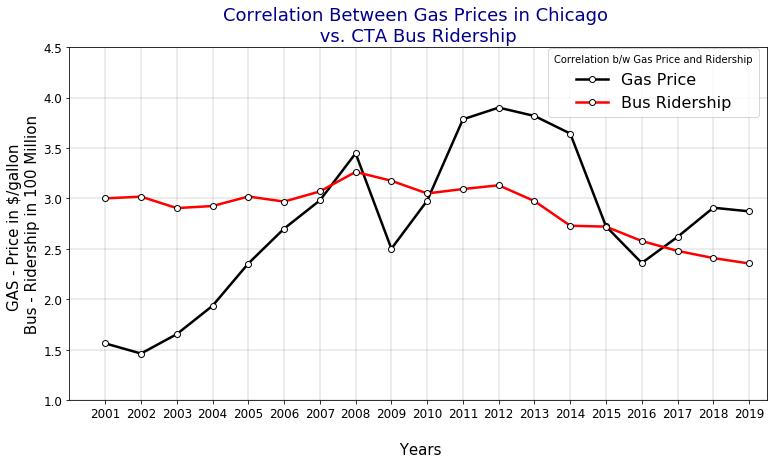

In [6]:
#Insight 2 : Hypothesis- Is ridership of buses correlated with gas prices
bh.gasvsbus(gas,monthly)
# Result- The decline in ridership is not correlated to gas price reduction, as the correlation factor is 0.094

In [ ]:
# Insight 3 : Most popular bus routes from 2001 to 2019
df = br.bar_race(monthly)

In [8]:
from IPython.display import HTML
HTML("""
<div class="flourish-embed flourish-bar-chart-race" data-src="visualisation/2187019" 
data-url="https://flo.uri.sh/visualisation/2187019/embed">
<script src="https://public.flourish.studio/resources/embed.js"></script></div>
""")

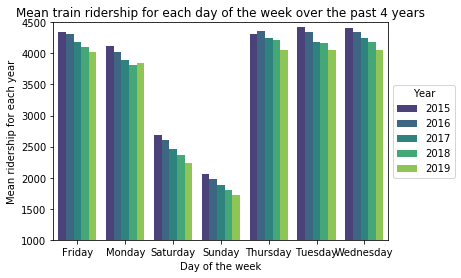

In [8]:
# Insight 4: The train ridership has been declining on all days of the week since the past 4 years
py_data_pivot = Kasturi.perform_eda(py_data)
py_data_pivot = Kasturi.perform_eda(py_data)
Kasturi.day_of_week(py_data_pivot)

### Predictions and Machine Learning
Predicting the ridership for 2019 using Long short-term memory (LSTM) and Auto-Regressive Integrated Moving Average(ARIMA) model. Ridership is the total number of people travelling by a particular bus route or via a train station. We used LSTM and ARIMA since they work exceptionally well with a time series data, such as ours. We can distinctly observe a pattern in the data, e.g. Ridership increase and peeks around the month of March and September, and then gradually decreases.

Ridership is a continuous variable that provides the monthly estimates of the people count via a bus or a station. We first predict an actual value of this variable for a future month and then categorize it with respect to the previous data whether the prediction states a 'Heavy Increase', 'Slight Increase', 'Almost Same', 'Slight Decrease' or a 'Heavy Decrease'.

In [9]:
#Baseline Regression average accuracy. Method : Mean.
bb.baseline(monthly)

The accuracy for baseline model of mean is: 63.08%


#### 1. Long Short Term Memory Network (LSTM) Model to predict the total ridership of the BUS in coming months
We used LSTM to predict the ridership over the years. We used 18 layers of LAG and 100 Epoche to find the prediction for the Ridership of Bus. This provides a prediction accuracy of ~ 93%

In [ ]:
#Making a stable graph, adding 18 lags, running for Then we apply 100 epochs to reduce the loss.
month_sum, df_result = bam.all_monthly_ml(monthly)

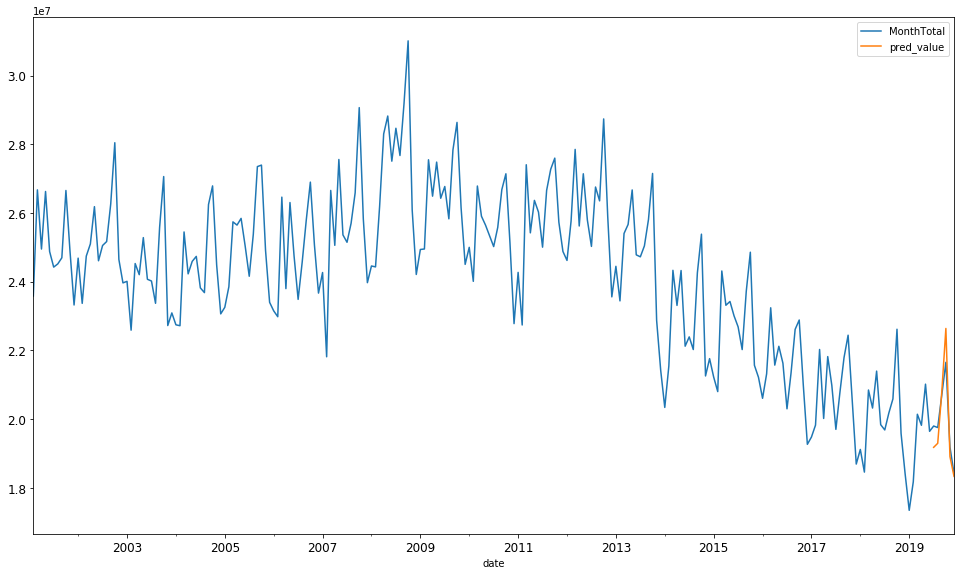

In [10]:
#Testing the model to predict total Ridership of CTA Buses for 2019.
bam.graph_all_bus(month_sum , df_result)

In [ ]:
#Predicting the Ridership values for each route each month for 2019 and classifying them into  5 classes :- 
# Heavy Increase, Slight Increase, Almost Same, Slight Decrease and Heavy Decrease
# Final result in a csv file uploaded on Github
final = bnm.route_prediction(monthly)

In [5]:
display(final)

,Month,route,Predicted_Ridership_2019,Ridership_2018,Classification,Accuracy_of_Prediction
0,July,3,440332,438230,Almost Same,98.023761
1,August,3,426639,425307,Almost Same,98.590945
2,September,3,437412,448073,Almost Same,97.997463
3,Ocotber,3,461374,490167,Almost Same,98.194521
4,November,3,406057,418467,Almost Same,97.216856
...,...,...,...,...,...,...
235,August,204,28801,26747,Almost Same,94.591184
236,September,204,29260,29765,Almost Same,94.494294
237,Ocotber,204,28039,31949,Slight Decrease,94.084359
238,November,204,27932,32453,Slight Decrease,93.809379


##### 2. Auto Regressive Integrated Moving Average (ARIMA) Model to predict the average monthly ridership of each bus and train station
Using Autoregressive integrated moving average (ARIMA), we were able to accurately predict the average monthly ridership for each month of the year 2019 by upto ~ 95% accuracy. 

Rolling Predictions - Using this trained model, we predict the average ridership for the month of January, 2019. We then add this predicted value to the data and re-train the model, to predict the value for the month of February, and so on till the month of December.

In [ ]:
ARIMA.list_bus_routes() # Provides a list of active bus routes

Prediction: Slight Decrease [Prediction Accuracy: 99.97]


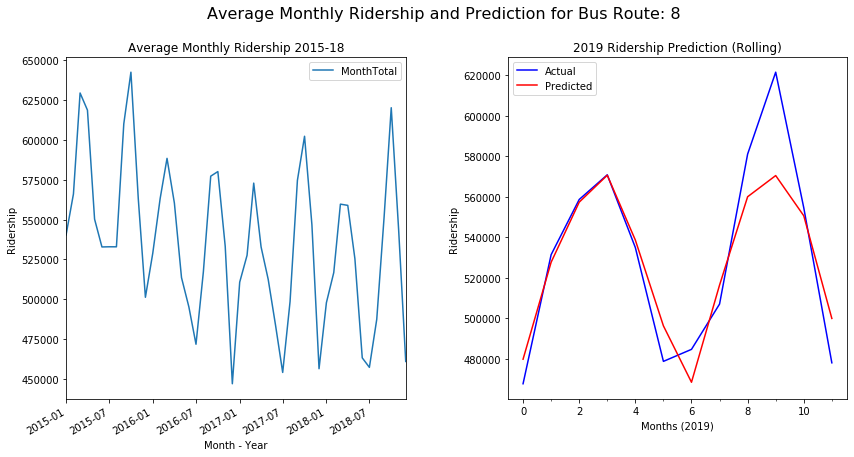

In [2]:
ARIMA.bus_prediction(route_number = '8') # Predicts the BUS RIDERSHIP for a particular bus route

In [ ]:
ARIMA.list_train_stations() # Provides a list of active train stations

Prediction: No significant change [Prediction Accuracy: 99.95]


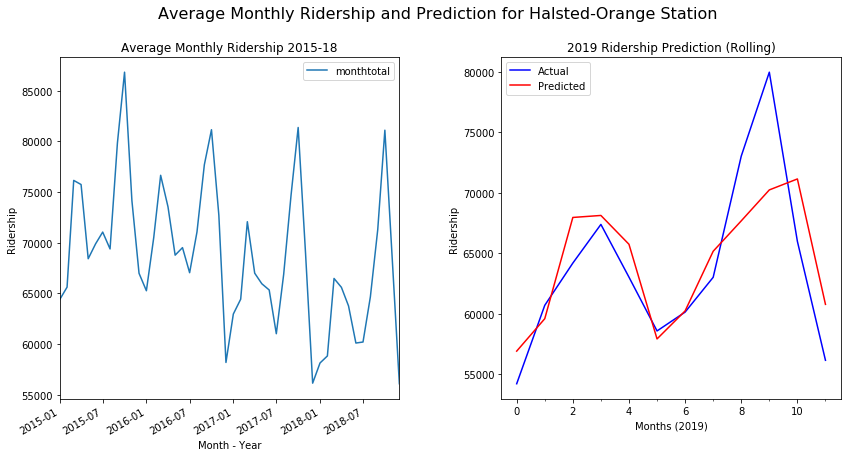

In [3]:
ARIMA.train_prediction(station_name = "Halsted-Orange") #Predicts the TRAIN STATION RIDERSHIP for a particular train station

**It should be noted that, as we continue to predict values for much further in the future, the predictions become less accurate. Obviously, it is easier to predict the average ridership for the upcoming month, compared to 6 months from now. Regardless, the model performs quite well.**

#### Conclusions
We gained insights on the reasons behind the **decline in bus and train ridership** and which bus and train stations were **more popular**. We also **predicted the ridership** values for each bus route and train station with about **95% accuracy** and **classified** each bus and train station into **5 categories**. Looking at these insights, CTA can find out which routes are more popular and looking at the predictions, they can see where ridership would grow in the future. According to this, CTA can manage their bus and train services to make their transportation efficient, meet with the needs of commuters and manage their finances well.